<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch05_03_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜: 2022-05-13
* 이름: 박태현

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [2]:
xs = np.array([3,5,5,7,8])
ys = np.array([20,50,60,90,100])

xs.shape, ys.shape

((5,), (5,))

* 데이터 시각화

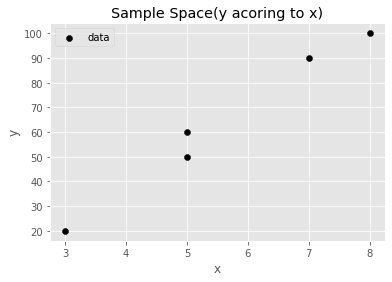

In [7]:
plt.scatter(xs,ys, c = 'k', label = 'data')

plt.title('Sample Space(y acoring to x)')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

### **| step 1. 모델 구현**

$model(x;w) = wx$

* 모델 정의

In [8]:
def model_simple(x,w = 1) : 
  return x*w

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20|3|
|5|50|5|
|5|60|5|
|7|90|7|
|8|100|8|

In [9]:
model_simple(xs)

array([3, 5, 5, 7, 8])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [12]:
total_loss = 0
for x,y in zip(xs, ys):
  y_pred = model_simple(x) # 예측값 구하기
  loss = np.abs(y_pred - y) # 손실 구하기
  total_loss += loss
  # print(f'x : {x}, y : {y}, y_pred : {y_pred}, loss : {loss}')
print(f'total loss : {total_loss}')


total loss : 292


In [28]:
# 순전파
def propagation(xs, ys, w) : 
  total_loss = 0
  for x,y in zip(xs, ys):
    y_pred = model_simple(x, w = w) # 예측값 구하기
    loss = np.abs(y_pred - y) # 손실 구하기
    total_loss += loss
    # print(f'x : {x}, y : {y}, y_pred : {y_pred}, loss : {loss}')
  return total_loss


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


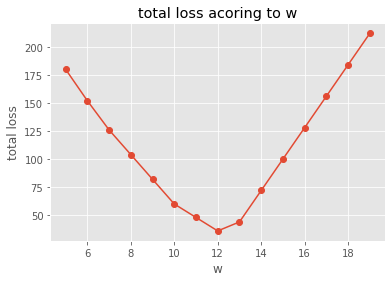

In [41]:
ws = np.arange(5,20)

total_losses = propagation(xs, ys, ws) # w값에 따른 total loss 배열

plt.plot(ws, total_losses, marker = 'o')

plt.title('total loss acoring to w')
plt.xlabel('w')
plt.ylabel('total loss')

plt.show()

### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [42]:
w_ = 12
propagation(xs, ys, w_)

36

* 학습 완료된 모델에 대한 예측 시각화

In [47]:
x_every = np.arange(11)
print(x_every)
y_preds = model_simple(x_every, w_)

[ 0  1  2  3  4  5  6  7  8  9 10]


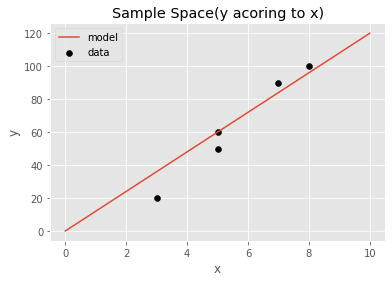

In [48]:
# 데이터 시각화
plt.scatter(xs,ys, c = 'k', label = 'data')
# 예측값 시각화
plt.plot(x_every, y_preds, label = 'model')

plt.title('Sample Space(y acoring to x)')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

* 공부시간이 6시간일 때 예상 점수는?


In [50]:
model_simple(6, w_)

72

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [52]:
x_tests = np.array([1,2,5,6,7])
y_tests = np.array([5,15,55,80,85])
x_tests.shape, y_tests.shape

((5,), (5,))

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [53]:
propagation(x_tests, y_tests, w_)

30

* 학습 완료된 모델에 테스트 데이터 예측 시각화

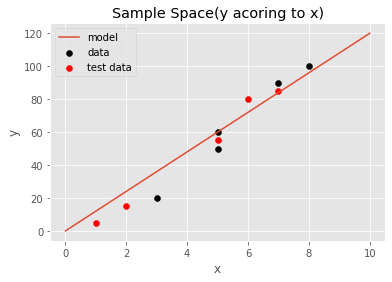

In [55]:
# 데이터 시각화
plt.scatter(xs,ys, c = 'k', label = 'data')
# 예측값 시각화
plt.plot(x_every, y_preds, label = 'model')
# 테스트 데이터 시각화
plt.scatter(x_tests,y_tests , c = 'r', label = 'test data')

plt.title('Sample Space(y acoring to x)')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [57]:
X = np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
ys = np.array([20,50,60,90,100])

X.shape, ys.shape

((5, 2), (5,))

* 데이터 시각화

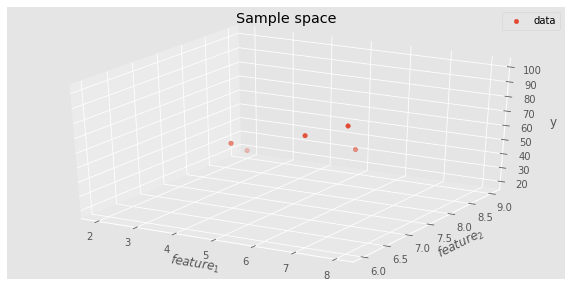

In [61]:
fig = plt.figure(figsize = (10,5))
ax = plt.axes(projection = '3d')
x1s = X[:,0]
x2s = X[:,1]
ax.scatter3D(x1s,x2s,ys, label = 'data')

ax.set_title('Sample space')
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$feature_2$')
ax.set_zlabel('y')

plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [66]:
def model_multi(x1,x2,w1 = 1,w2 = 1): # 찾아야 하는 학습 파라미터 2개
  return x1 * w1 + x2 * w2

* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|11|
|6|8|50|14|
|4|7|60|11|
|7|6|90|13|
|8|6|100|14|

In [65]:
model_multi(x1s,x2s)

array([11, 14, 11, 13, 14])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [69]:
# 순전파
def propagation2(X, ys, w1, w2) : 
  total_loss = 0
  for x,y in zip(X, ys):
    y_pred = model_multi(x[0], x[1], w1 = w1, w2 = w2) # 예측값 구하기
    loss = np.abs(y_pred - y) # 손실 구하기
    total_loss += loss
    # print(f'x : {x}, y : {y}, y_pred : {y_pred}, loss : {loss}')
  return total_loss

propagation2(X, ys, 1,1)

257

### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


In [80]:
w1s = np.arange(0,30)
w2s = np.arange(-10,10)

W1, W2 = np.meshgrid(w1s, w2s)

L = propagation2(X, ys, W1, W2) # w값에 따른 total loss 배열

W1.shape, W2.shape, L.shape

((20, 30), (20, 30), (20, 30))

* 3d플롯으로 시각화

No handles with labels found to put in legend.


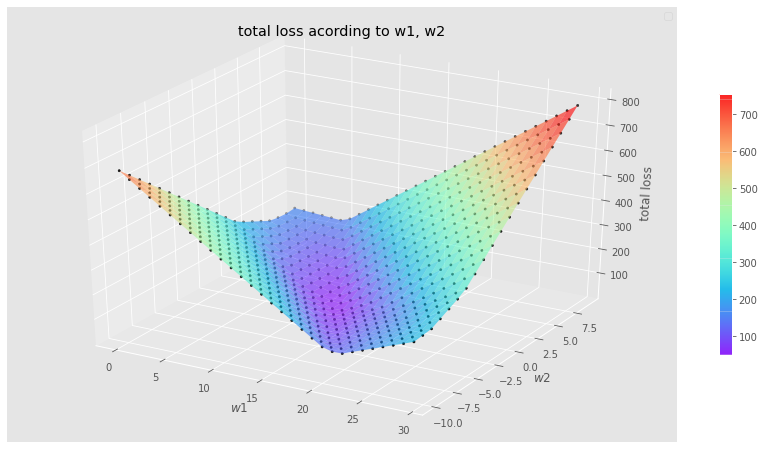

In [88]:
fig = plt.figure(figsize = (15,8))
ax = plt.axes(projection = '3d')
# w1, w2에 대한 loss 시각화
ax.scatter3D(W1,W2, L, c = 'k', marker = '.')
surf = ax.plot_surface(W1, W2, L, cmap = 'rainbow', alpha = .6)
fig.colorbar(surf, shrink = .6)

ax.set_title('total loss acording to w1, w2')
ax.set_xlabel('$w1$')
ax.set_ylabel('$w2$')
ax.set_zlabel('total loss')

plt.legend()
plt.show()

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

In [102]:
np.min(L) # 최소값
min_index = np.argmin(L) # 최소값의 인덱스 반환

w1_ = W1.flatten()[min_index] 
w2_ = W2.flatten()[min_index]
print(w1_, w2_, np.min(L))

13 -1 45


* 학습 완료된 모델의 최종 손실 계산

In [103]:
propagation2(X, ys, w1_, w2_)

45

* 학습 완료된 모델에 대한 예측 시각화

In [106]:
x1_every = np.arange(10)
x2_every = np.arange(10)
X1_every, X2_every = np.meshgrid(x1_every, x2_every)
Y_pred = model_multi(X1_every, X2_every, w1_, w2_)

X1_every.shape, X2_every.shape

((10, 10), (10, 10))

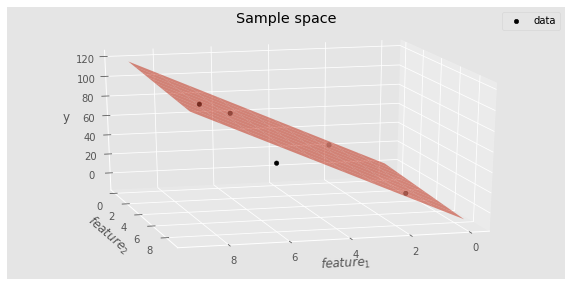

In [110]:
fig = plt.figure(figsize = (10,5))
ax = plt.axes(projection = '3d')
# 데이터셋
ax.scatter3D(x1s,x2s,ys, c = 'k', label = 'data')
# 예측 모형
ax.plot_surface(X1_every, X2_every, Y_pred, alpha = .6)

ax.set_title('Sample space')
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$feature_2$')
ax.set_zlabel('y')

ax.view_init(20,75) # 상하 회전, 좌우 회전
plt.legend()
plt.show()

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

* 학습 완료된 모델에 테스트 데이터 예측 시각화

## 클래스 작성하기
---

```
단순 선형회귀 분석 클래스를 작성합니다.

model = Model() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```

In [183]:
class SimpleModel() : 
  def __init__(self):
    self.w = 1

  def propagation(self, xs, ys, w) : 
    total_loss = 0
    for x,y in zip(xs, ys):
      y_pred = model_simple(x, w = w) # 예측값 구하기
      loss = np.abs(y_pred - y) # 손실 구하기
      total_loss += loss
    
  def fit(self, xs, ys):
    self.xs = xs
    self.ys = ys

    ws = np.arange(5,20)
    total_losses = propagation(xs, ys, ws)
    plt.plot(ws, total_losses, marker = 'o')

    plt.title('total loss acoring to w')
    plt.xlabel('w')
    plt.ylabel('total loss')

    return plt.show()

  def predict(self, xs):
    xs = xs
    total_losses = propagation(xs, ys, ws)
    w_ = np.argmin(total_losses) + 5

    self.x_every = np.arange(11)
    self.y_preds = x_every * w_

    # 데이터 시각화
    plt.scatter(xs,ys, c = 'k', label = 'data')
    # 예측값 시각화
    plt.plot(x_every, y_preds, label = 'model')

    plt.title('Sample Space(y acoring to x)')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.legend()

    return plt.show()

  def validation(self, xs_test, ys_test): 

    x_test = xs_test
    y_test = ys_test

    vali = propagation(x_tests, y_tests, w_)


    # 데이터 시각화
    plt.scatter(xs,ys, c = 'k', label = 'data')
    # 예측값 시각화
    plt.plot(x_every, y_preds, label = 'model')
    # 테스트 데이터 시각화
    plt.scatter(x_tests,y_tests , c = 'r', label = 'test data')

    plt.title('Sample Space(y acoring to x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    return print('validation :', vali)


model = SimpleModel()

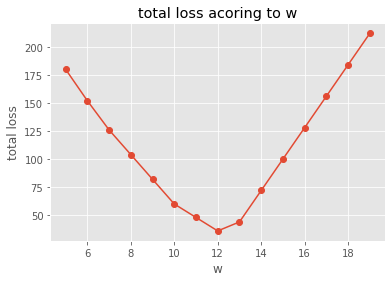

In [175]:
xs = np.array([3,5,5,7,8])
ys = np.array([20,50,60,90,100])

model.fit(xs,ys)

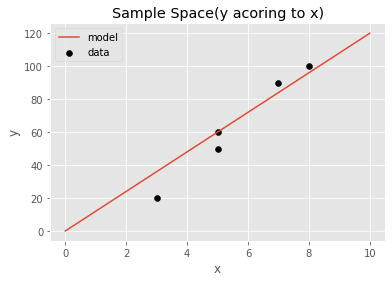

In [176]:
model.predict(xs)

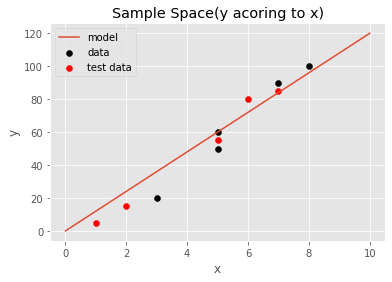

validation : 30


In [184]:
x_tests = np.array([1,2,5,6,7])
y_tests = np.array([5,15,55,80,85])

model.validation(x_tests, y_tests)